In [8]:
import geopandas
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn import preprocessing, datasets
import matplotlib.pyplot as plt
import csv
import os
from sklearn.metrics import pairwise_distances_argmin
import pandas as pd
from scipy.spatial.distance import cdist,pdist
import itertools
from mpl_toolkits.basemap import Basemap
import math
from scipy import stats
from scipy.sparse import *

In [9]:
os.getcwd()

'/Users/qiancao/Documents'

In [21]:
g = open('worldcities.csv')
csv_f = csv.reader(g,None)
next(csv_f,None)

XX=[]
for row in csv_f:
    row[0],row[1],row[2] = float(row[0]),float(row[1]),float(row[2])
    XX.append(row)

XX = np.array(XX)
X=XX[:,[0,1]]

## I. plotting the sites status quo
#### Finding outstanding sites, like Indonesia has sites plotted in the ocean

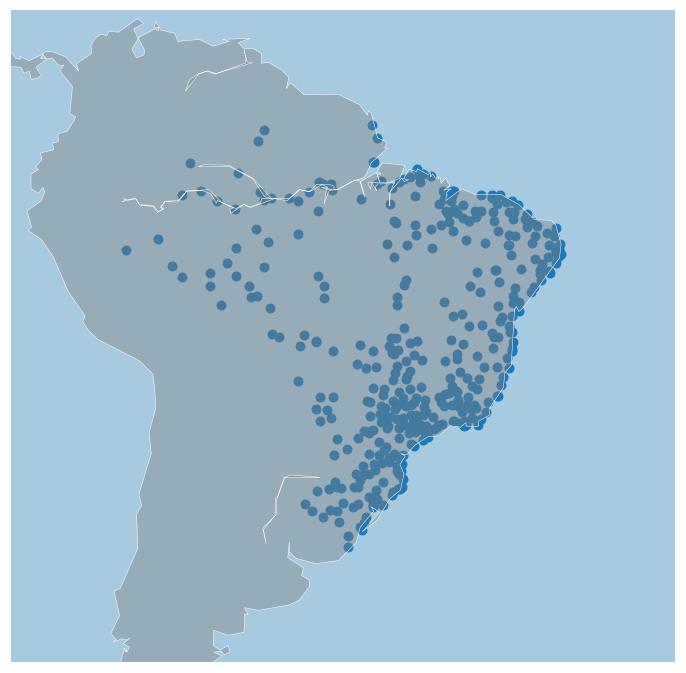

In [160]:
plt.figure(figsize=(12,12))
mm = Basemap(llcrnrlon = min(X[:,0])-10,llcrnrlat = min(X[:,1])-10, urcrnrlon = max(X[:,0])+10,urcrnrlat = max(X[:,1])+10)
mm.drawmapboundary(fill_color = '#A6CAE0',linewidth = 0)
mm.fillcontinents(color = 'grey', alpha = 0.4, lake_color = 'grey')
mm.drawcoastlines(linewidth = 0.5,color = 'white')

plt.scatter(X[:,0],X[:,1],s=80,cmap='viridis')
plt.show()

## II. Clustering w/ Center of Gravity Model

In [161]:
## delete following

In [206]:
rng = np.random.RandomState(2)

In [207]:
i = rng.permutation(X.shape[0])[:5]

In [208]:
print(X[i])

[[-44.095  -22.5196]
 [-44.57   -20.06  ]
 [-37.34    -5.19  ]
 [-39.02    -4.97  ]
 [-60.62    -3.2896]]


In [209]:
from numpy import array

In [210]:
Y=[]
Y = X[i]

In [211]:
type(Y)

numpy.ndarray

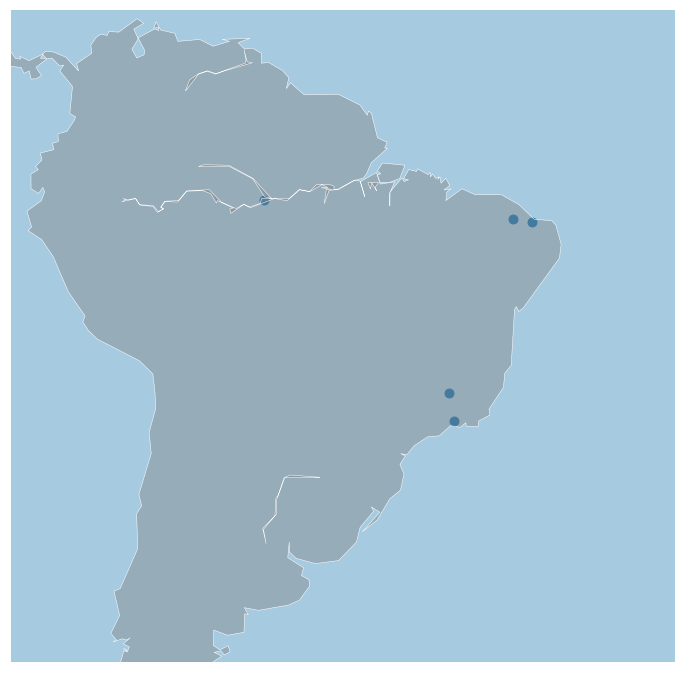

In [212]:
plt.figure(figsize=(12,12))
mm = Basemap(llcrnrlon = min(X[:,0])-10,llcrnrlat = min(X[:,1])-10, urcrnrlon = max(X[:,0])+10,urcrnrlat = max(X[:,1])+10)
mm.drawmapboundary(fill_color = '#A6CAE0',linewidth = 0)
mm.fillcontinents(color = 'grey', alpha = 0.4, lake_color = 'grey')
mm.drawcoastlines(linewidth = 0.5,color = 'white')
plt.scatter(Y[:,0],Y[:,1],s=80,cmap='viridis')
plt.show()

In [179]:
labels = pairwise_distances_argmin(X,Y_array)

In [180]:
while True:
    #2a. Assign labels based on closest center: if 5 centers, then labels have 0,1,2,3,4
    labels = pairwise_distances_argmin(X,Y_center)
    #2b. Find new centers from means of points
    new_centers = np.array([X[labels ==i].mean(0) for i in range(5)])
    #2c. Check for convergence
    if np.all(Y_center == new_centers):
        break
    Y_center = new_centers

In [181]:
Y_center

array([[-41.48092264,  -6.05162264],
       [-49.537803  , -20.353152  ],
       [-42.19167353, -18.36268382],
       [-51.66391077, -28.05258308],
       [-60.15171042,  -5.624475  ]])

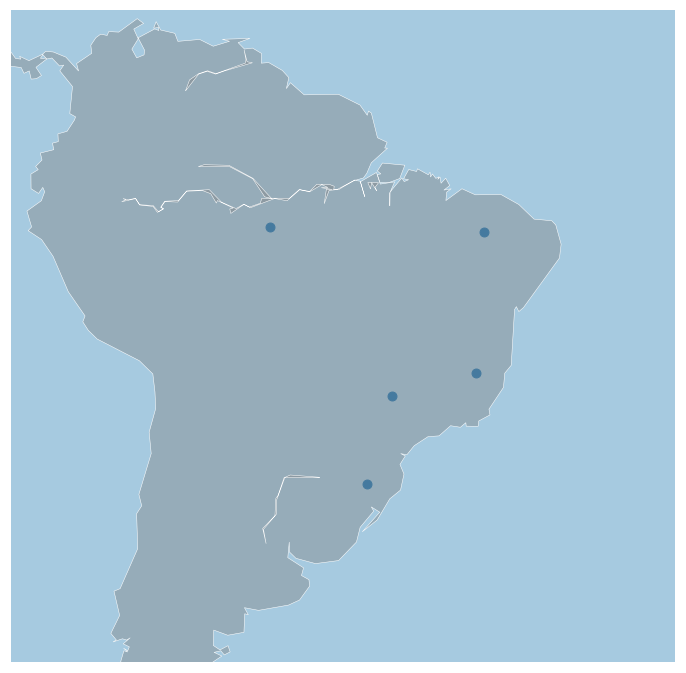

In [182]:
plt.figure(figsize=(12,12))
mm = Basemap(llcrnrlon = min(X[:,0])-10,llcrnrlat = min(X[:,1])-10, urcrnrlon = max(X[:,0])+10,urcrnrlat = max(X[:,1])+10)
mm.drawmapboundary(fill_color = '#A6CAE0',linewidth = 0)
mm.fillcontinents(color = 'grey', alpha = 0.4, lake_color = 'grey')
mm.drawcoastlines(linewidth = 0.5,color = 'white')
plt.scatter(Y_center[:,0],Y_center[:,1],s=80,cmap='viridis')
plt.show()

In [186]:
clusters = {}

In [218]:
clusters = {}
n=0
for item in labels:
    if item in clusters:
        clusters[item].append(X[n])
    else:
        clusters[item] = [X[n]]
    n+=1

In [249]:
a=[]
b=[]
k=5

for i in range (k):
    for j in (clusters[i]):
        a.append(j)

for m in range(k):
    for n in range (len(clusters[m])):
        b.append(Y[m])

matrix1 = pd.DataFrame(a,columns=['CENT_LON','CENT_LAT'])
matrix2 = pd.DataFrame(b,columns=['CLST_LON','CLST_LAT'])
matrix  = pd.concat([matrix1,matrix2],axis=1,join_axes=[matrix1.index])


In [300]:
matrix.iloc[0,:]

CENT_LON   -40.3100
CENT_LAT    -5.9995
CLST_LON   -44.0950
CLST_LAT   -22.5196
Name: 0, dtype: float64

In [301]:
def haversine(lon1,lat1,lon2,lat2):
    """
    Calculate the great circle distance between 2 points
    on the earch (specifid in decimal degree)
    """
    # Convert decimal degree to radians
    lon1,lat1,lon2,lat2 = map(np.radians,[lon1,lat1,lon2,lat2])
    # Haversine formula
    dlon = lon2-lon1
    dlat = lat2-lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.math.asin(np.sqrt(a))
    #r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    km = 6367 * c
    return km

In [306]:
[matrix.iloc[0,0],matrix.iloc[0,1],matrix.iloc[0,2],matrix.iloc[0,3]]

[-40.31, -5.9995, -44.095, -22.5196]

In [302]:
haversine(matrix.iloc[0,0],matrix.iloc[0,1],matrix.iloc[0,2],matrix.iloc[0,3])

TypeError: input must be an array, list, tuple or scalar

In [295]:
for i in matrix.index:
    matrix.loc[i,'CENT_SITE_DIST'] = 1.19*haversine(matrix.loc[i,'CENT_LON'],matrix.loc[i,'CENT_LAT'],matrix.loc[i,'CLST_LON'],matrix.loc[i,'CLST_LAT'])

TypeError: input must be an array, list, tuple or scalar

In [176]:
# delete above

In [253]:
# Assign random clusters as hyperparameter initially, will be optimized by model iteration later

## k: number of clusters
## X: all sites array
## sla: period from despatching to destination
## kmh: kilometer per hour for driving speed
## h: driver driving time per day
## q: sites coverage by such policy (percent)

def model_Kmeans(k,X,sla=2,kmh=60,h=8,q=.9):
    def find_clusters (X, n_clusters, rseed=2):
        #1.Randomly choose clusters
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:n_clusters]
        centers = X[i]
        
        while True:
            #2a. Assign labels based on closest center: if 5 centers, then labels have 0,1,2,3,4
            labels = pairwise_distances_argmin(X,centers)
            #2b. Find new centers from means of points
            new_centers = np.array([X[labels ==i].mean(0) for i in range(n_clusters)])
            #2c. Check for convergence
            if np.all(centers == new_centers):
                break
            centers = new_centers
        return centers, labels
    centers,labels = find_clusters(X,k)
    # So far the centers are fixed, regardless random centers changes.
    
    # Add each coordination to clusters, which is a dictionary {item(label), X_coordinate}
    clusters = {}
    n=0
    for item in labels:
        if item in clusters:
            clusters[item].append(X[n])
        else:
            clusters[item] = [X[n]]
        n+=1
        
    ### Build distance matrix
    def haversine(lon1,lat1,lon2,lat2):
        """
        Calculate the great circle distance between 2 points
        on the earch (specifid in decimal degree)
        """
        # Convert decimal degree to radians
        lon1,lat1,lon2,lat2 = map(np.radians,[lon1,lat1,lon2,lat2])
        # Haversine formula
        dlon = lon2-lon1
        dlat = lat2-lat1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.math.asin(np.sqrt(a))
        #r = 6371 # Radius of earth in kilometers. Use 3956 for miles
        km = 6367 * c
        return km
    
    a=[]
    b=[]
    
    for i in range (k):
        for j in (clusters[i]):
            a.append(j)
            
    for m in range(k):
        for n in range (len(clusters[m])):
            b.append(centers[m])
            
    matrix1 = pd.DataFrame(a,columns=['CENT_LON','CENT_LAT'])
    matrix2 = pd.DataFrame(b,columns=['CLST_LON','CLST_LAT'])
    matrix  = pd.concat([matrix1,matrix2],axis=1,join_axes=[matrix1.index])
    
    for i in matrix.index:
        matrix.ix[i,'CENT_SITE_DIST'] = 1.19*haversine(matrix.ix[i,'CENT_LON'],matrix.ix[i,'CENT_LAT'],matrix.ix[i,'CLST_LON'],matrix.ix[i,'CLST_LAT'])
        
    # Drop duplicated site for avoiding dulicate CBM mapping
    matrix.drop_duplicates(subset=['CENT_LON','CENT_LAT'],inplace=True)
    matrix.reset_index(drop = True,inplace = True)
    
    # Processing the dataset for adding volume
    df_v = pd.DataFrame(XX,columns=['ORG_LON','ORG_LAT','VRM'])
    df_v.CBM = df_v.CBM.apply(lambda x: float(x))
    df_v = df_v.groupby(['ORG_LON','ORG_LAT'])['CBM'].sum()
    df_gpv = pd.DataFrame(df_v).reset_index()
    
    matrix_V = pd.merge(matrix,df_gpv,left_on=['CENT_LON','CENT_LAT'],right_on=['ORG_LON','ORG_LAT'])
    matrix_V.drop(['CENT_LON','CENT_LAT'],axis = 1, inplace = True)
    
    # The center-of-gravity method
    # Cx = Sum(DixVi)/Sum(Vi) AND Cy = Sum(DiyVi)/Sum(Vi)
    # Parameters: 
    # Cx--重心的X坐标 
    # Cy--重心的Y坐标
    # Dix--第i个地点的X坐标
    # Diy--第i个地点的Y坐标
    # Vi--运到第i个地点，或从第i地点运出的货物量

    matrix_V_gb = matrix_V.groupby(['CLST_LON','CLST_LAT'])
    
    # Calculating the Center of Gravity
    def COG(gp):
        LON = sum(np.multiply(gp['ORG_LON'],gp['CBM']))/sum(gp['CBM'])
        LAT = sum(np.multiply(gp['ORG_LAT'],gp['CBM']))/sum(gp['CBM'])
        return LON,LAT
    
    # Adding the new-COG to the clusted diagram list
    Re_center = matrix_V_gb.apply(lambda grp: COG(grp)[0])
    matrix_COG = pd.DataFrame(Re_center).reset_index()
    matrix_COG.columns = ['CLST_LON','CLST_LAT','COG_LON']
    centerList=matrix_V_gb.apply(lambda grp: COG(grp)[1]).values
    matrix_COG['COG_LAT'] = centerList
    
    matrix_New = pd.merge(matrix_V,matrix_COG, on=['CLST_LON','CLST_LAT'],how = 'left')
    matrix_New = matrix_New[['ORG_LON','ORG_LAT','COG_LON','COG_LAT','CBM']]
    
    for i in matrix_New.index:
        matrix_New.ix[i,'DISTANCE']= 1.19*haversine(matrix_New.ix[i,'ORG_LON'],matrix_New.ix[i,'ORG_LAT'],matrix_New.ix[i,'COG_LON'],matrix_New.ix[i,'COG_LAT'])
        
        
    # Sort distance ascending by clusters
    m_min = matrix_New.sort_values(by=['COG_LON','COG_LAT','DISTANCE']).groupby(['COG_LON','COG_LAT']).head(1)
    
    # Apply closest site to the Center Location
    def replace_COG(df):
        test=m_min[(m_min.COG_LON == df['COG_LON']) & (m_min.COG_LAT == df['COG_LAT'])]
        df['COG_LON']=test['ORG_LON']
        df['COG_LAT']=test['ORG_LAT']
        return df
    
    matrix_New.apply(replace_COG,axis=1)
    
    # Stacking LON and LAT to one array
    Centroids_New = np.column_stack((matrix_New.COG_LON.unique(),matrix_New.COG_LAT.unique()))
    SLA = matrix_New.groupby(['COG_LON','COG_LAT'])['DISTANCE'].quantile(q)/kmh/h
    
    # Calculating the SLA
    matrix_New['SLA'] = matrix_New['DISTANCE'].apply(lambda x: math.ceil(float(x/kmh)/h))
    matrix_New.sort_values(['COG_LON','COG_LAT','SLA'],ascending = ['False,False,True'],inplace = True)
    
    percentile = stats.percentileofscore(matrix_New['SLA'],sla+1,kind='rank')
    return SLA, percentile,centers,matrix_New,Centroids_New,labels
        

## III. Run Model: finding conditions complying with required SLA:
### Step1. Initialization: 
Hyperparameter: SLA limit, Tranportation speed, Working Hours, Coverage by Percent

In [254]:
SLA = 0.5
kmh = 60
h = 8
q = 0.9

### Step2. Find out proper K of clusters satisfying SLA required

In [255]:
for k in range (1,10):
    p = model_Kmeans(k,X,SLA,kmh,h)[1]
    s = model_Kmeans(k,X,SLA,kmh,h)[0]
    print (k, 'centers',SLA, 'day(s) covers', round(p,1), '% sites')
    if (max(s.values)>SLA) | (p<90):
        print (round(max(s.values),2),'day(s) covers', q*100, '% sites')
        continue
    else:
        print (round(max(s.values),2),'day(s) covers',round(p,1), '% sites')
        break

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


TypeError: input must be an array, list, tuple or scalar